In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy
from os.path import join

# Plotting parameters
pt=1./72.27
textwidth=345.*pt
golden = (1 + 5 ** 0.5) / 2
plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use("paper.mplstyle")
large_figsize =  (1.5*textwidth,1.5*textwidth/golden)
fig_direc = "figures"
# os.mkdir(fig_direc)
line_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
# Function to produce plots here
def plot_data(data,cellname,ymax=None,save=False):
    bvals = data['bvals']

    shape = bvals.shape

    signal_cell = data['signal_cell'].reshape(shape)
    signal_soma = data['signal_soma'].reshape(shape)
    signal_neurite_compartment = data['signal_neurite_compartment'].reshape(shape)
    volume = data['volume']
    volume_soma = data['volume_soma']
    volume_neurite_cmpt = data['volume_neurite_cmpt']

    signal_cell_um = data['signal_cell_um'].reshape(shape)
    signal_soma_um = data['signal_soma_um'].reshape(shape)
    signal_neurite_compartment_um = data['signal_neurite_compartment_um'].reshape(shape)
    volume_um = data['volume_um']
    volume_soma_um = data['volume_soma_um']
    volume_neurite_cmpt_um = data['volume_neurite_cmpt_um']

    signal_soma = signal_soma/volume_soma
    signal_neurite_compartment = signal_neurite_compartment/volume_neurite_cmpt


    signal_soma_um = signal_soma_um/volume_soma_um
    signal_neurite_compartment_um = signal_neurite_compartment_um/volume_neurite_cmpt_um

    fig = plt.figure(figsize=large_figsize)
    ax = fig.add_subplot()

    ax.plot(bvals,signal_cell,label='AMS Cell',color=line_colors[0],marker='x')
    ax.plot(bvals,signal_cell_um,label='MU Cell',color=line_colors[0],marker='+',linestyle='dashed')
    ax.plot(bvals,signal_soma,label='AMS Soma',color=line_colors[1],marker='x')
    ax.plot(bvals,signal_soma_um,label='MU Soma',color=line_colors[1],marker='+',linestyle='dashed')
    ax.plot(bvals,signal_neurite_compartment,label='AMS Neurites',color=line_colors[2],marker='x')
    ax.plot(bvals,signal_neurite_compartment_um,label='MU Neurites',color=line_colors[2],marker='+',linestyle='dashed')

    ax.set_ylabel('Volume weighted signal')
    ax.set_xlabel('$b$ s/mm$^2$')
    ax.set_title('Volume weighted signals: '+cellname)
    ax.legend()
    if save:
        plt.savefig(join(fig_direc,cellname.replace('.','_')+'_signals'))
    plt.show()


    fig = plt.figure(figsize=large_figsize)
    ax = fig.add_subplot()

    ax.plot(bvals,abs(signal_cell-signal_cell_um),label='Cell',color=line_colors[0],marker='x')
    ax.plot(bvals,abs(signal_soma-signal_soma_um),label='Soma',color=line_colors[1],marker='x')
    ax.plot(bvals,abs(signal_neurite_compartment-signal_neurite_compartment_um),label='Neurites',color=line_colors[2],marker='x')

    ax.set_ylabel('Absolute (volume-weighted) signal differences')
    ax.set_xlabel('$b$ s/mm$^2$')
    ax.set_title('Absolute (volume-weighted) signal differences: '+cellname)
    ax.legend()
    if ymax is not None:
        ax.set_ylim(0,ymax)
    if save:
        plt.savefig(join(fig_direc,cellname.replace('.','_')+'_difference_breakdown'))
    
    plt.show()


## Neuron plots

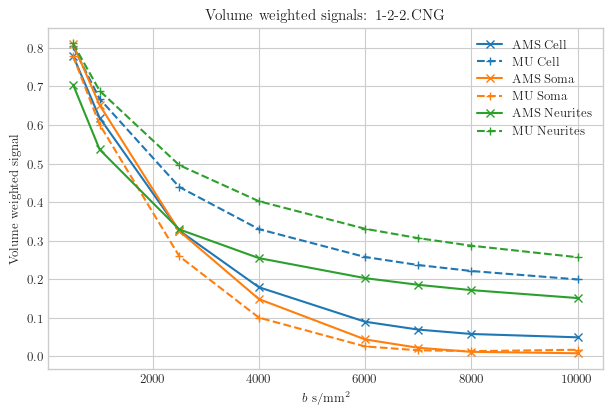

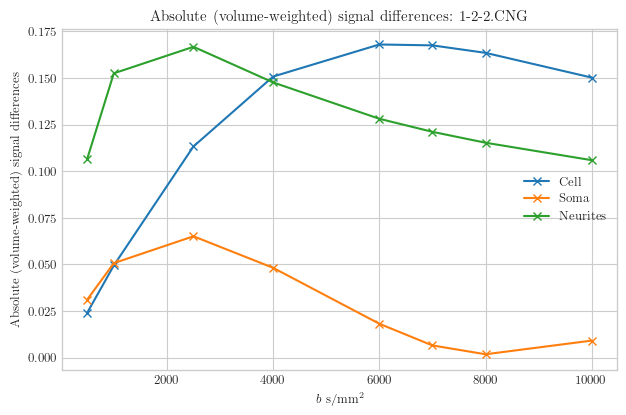

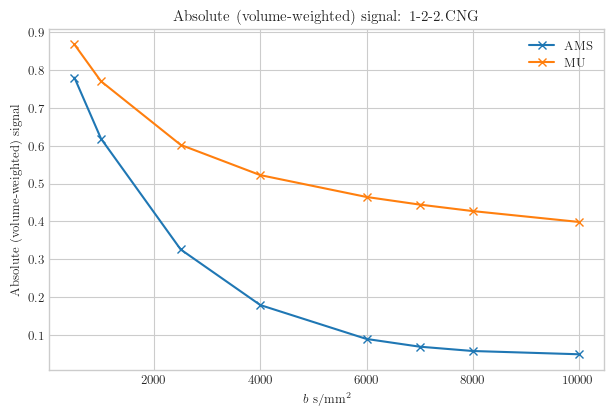

In [52]:

file=r'../neuron_meshing_paper/neuron_output/1-2-2.CNG_seg.mat'

data = scipy.io.loadmat(file)
plot_data(data,'1-2-2.CNG',save=True)

bvals = data['bvals']

shape = bvals.shape

signal_cell = data['signal_cell'].reshape(shape)
signal_soma = data['signal_soma'].reshape(shape)

fig = plt.figure(figsize=large_figsize)
ax = fig.add_subplot()

ax.plot(bvals,signal_cell,label='AMS',color=line_colors[0],marker='x')
ax.plot(bvals,signal_cell_um,label='MU',color=line_colors[1],marker='x')

ax.set_ylabel('Absolute (volume-weighted) signal')
ax.set_xlabel('$b$ s/mm$^2$')
ax.set_title('Absolute (volume-weighted) signal: '+'1-2-2.CNG')
ax.legend()
plt.savefig(join(fig_direc,'1-2-2.CNG'.replace('.','_')+'_cell_signals'))

plt.show()



## Microglia plots

microglia_output\714_3_2_seg.mat


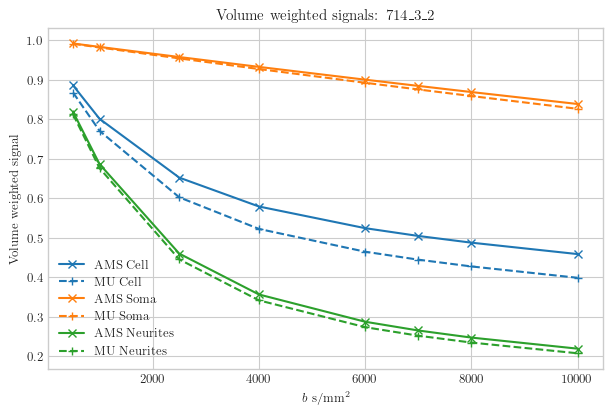

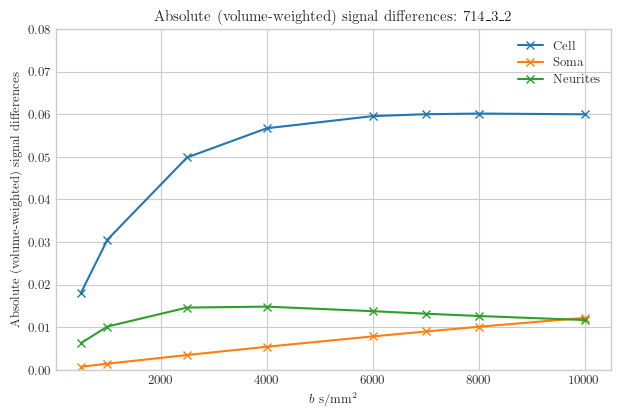

microglia_output\714_3_3_seg.mat


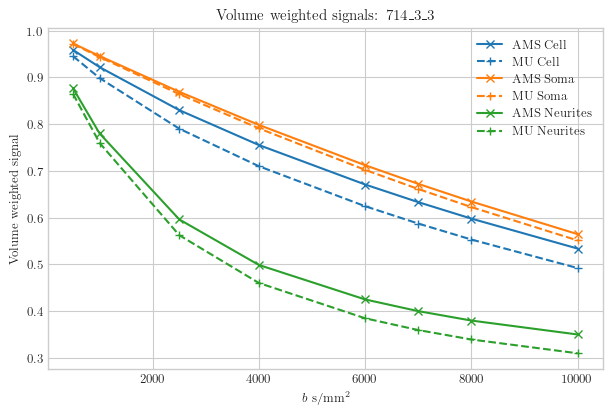

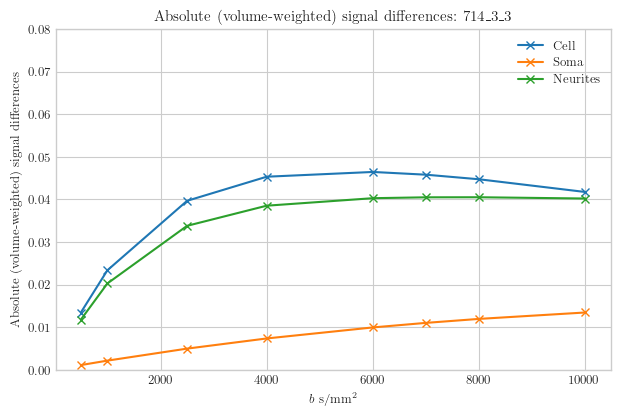

microglia_output\766_4_3_seg.mat


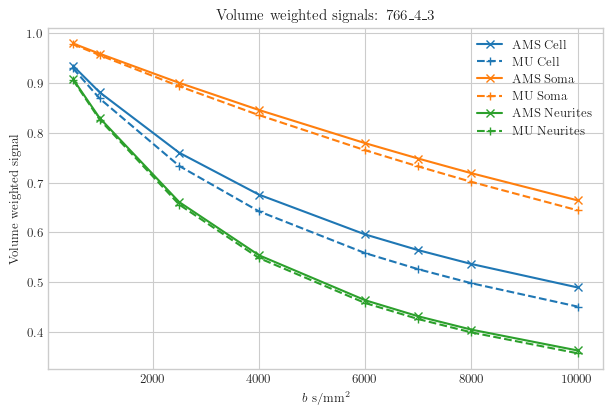

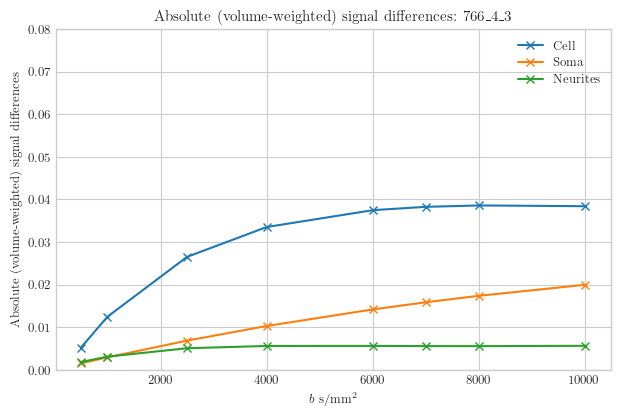

microglia_output\818_1_3_seg.mat


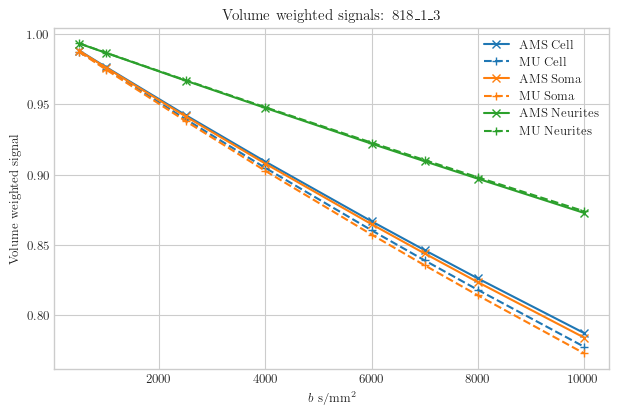

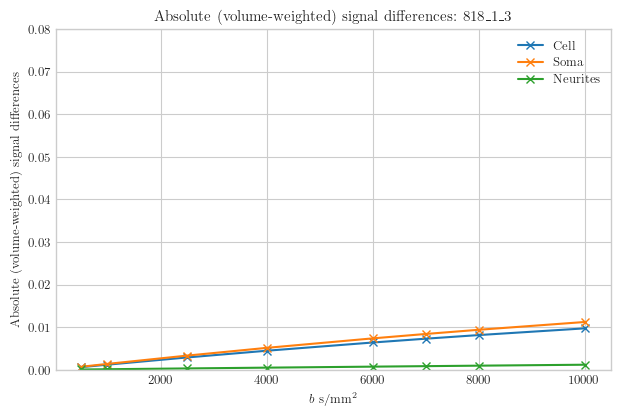

microglia_output\826_6_3_seg.mat


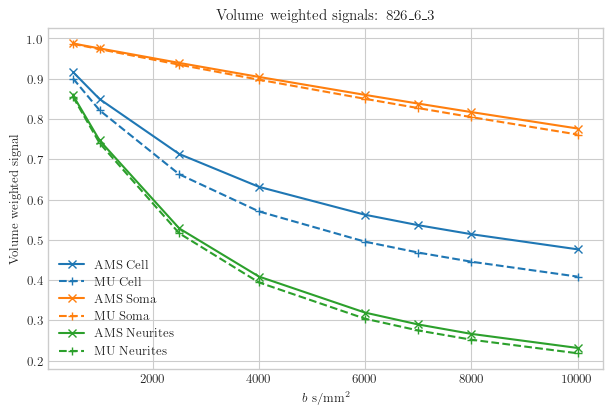

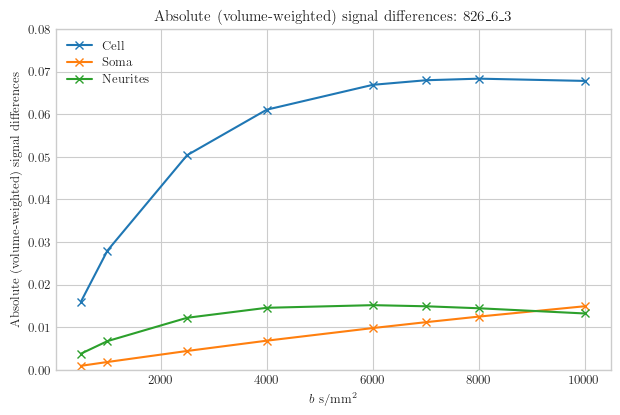

microglia_output\ctrl_010319_13_826-2_1_seg.mat


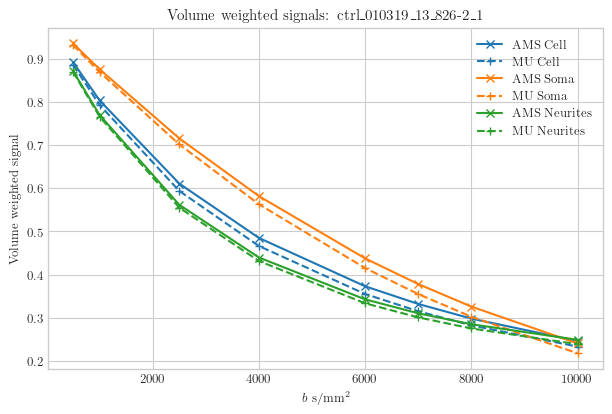

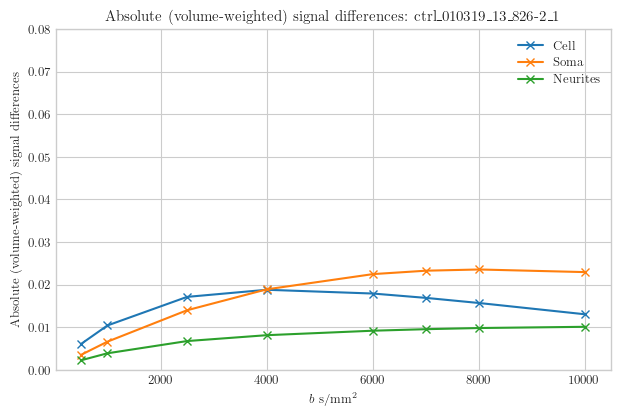

In [50]:
files = [os.path.join(r'microglia_output',file) for file in os.listdir(r'microglia_output') if file.endswith('.mat')]

for file in files:
    print(file)
    data = scipy.io.loadmat(file)
    cellname = os.path.basename(file).replace('_seg.mat','')
    plot_data(data,cellname,ymax=0.08,save=True)